<a href="https://colab.research.google.com/github/tpcorreia/MyNotes_Bizu/blob/EDA/EDA_Car_Crash_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
c4=cm.get_cmap('Set3')

In [2]:
# To Download the CarCrashDataSet from github
#https://github.com/tpcorreia/Master_AI_2023_UAX/blob/EDA-Training/CarCrashDataset.xlsx
import pandas as pd
# Option 1: If you want to read directly from the github repository
url = 'https://github.com/tpcorreia/Master_AI_2023_UAX/raw/EDA-Training/CarCrashDataset.xlsx'
# Create an ExcelFile object
xls = pd.ExcelFile(url)
# Load the specific sheet from the Excel file
data = pd.read_excel(xls)
# Replace 'YourSheetName' with the actual name of the sheet you want to read
# Print the data
print(data)
# Additional information about the DataFrame
data.info()
print("\n\n\nThe Car Crash Dataset is now stored in a Pandas Dataframe called data")


# To save the CarCrash DataSet into Google Colab runtime environment.
# Specify the file path for the XLSX file
xlsx_filename = '/content/CarCrashDataset.xlsx'
# Save the DataFrame to an XLSX file
data.to_excel(xlsx_filename, index=False)  # Set index=False to exclude the index column

# Specify the file path for the CSV file
csv_filename = '/content/CarCrashDataset.csv'
# Save the DataFrame to a CSV file
data.to_csv(csv_filename, index=False)  # Set index=False to exclude the index column

       Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0      2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1      2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2      2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3      2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4      2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   
...     ...    ...  ...      ...     ...            ...                 ...   
53938  2003     10    6  Weekday  1700.0          2-Car   No injury/unknown   
53939  2003     11    3  Weekday   800.0          1-Car   No injury/unknown   
53940  2003     12    5  Weekday  1200.0          2-Car   No injury/unknown   
53941  2003     12    1  Weekend   700.0          2-Car   No injury/unknown   
53942  2003     12    7  Weekend  1700.0          2-Car  Non-incapacitating   

                              Primary Factor      R

In [3]:
print(data.duplicated().sum())
print(data[data.duplicated()].head(30))
#filtered_df = data[(data['Year'] == 2015) & (data['Month'] == 1) & (data['Day'] == 1) & (data['Weekend?'] == 'Weekend')]

# Filter rows where both "Year" is 2015 and "Month" is 1
# filtered_df = df[(df['Year'] == 2015) & (df['Month'] == 1)]

# Print the filtered DataFrame
#print(filtered_df)


# & (data['Day' == 1 ])])
# & (data['Weekend?' == 'Weekend' ]) & (data['Hour' == 900.0]) & (data['Collision Type' == '1-Car']) & (data['Injury Type' == 'No injuty/unknown'])])


64
       Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
163    2015      1    1  Weekend   900.0          1-Car   No injury/unknown   
577    2015      1    5  Weekday  1900.0          2-Car   No injury/unknown   
845    2015      2    2  Weekday  2000.0          2-Car   No injury/unknown   
1851   2015      5    7  Weekend  2100.0          1-Car   No injury/unknown   
2136   2015      6    1  Weekend  1600.0          2-Car   No injury/unknown   
5031   2014      7    5  Weekday  1800.0          2-Car   No injury/unknown   
5518   2014      8    3  Weekday  1200.0          2-Car   No injury/unknown   
5615   2014      7    1  Weekend  1400.0          1-Car   No injury/unknown   
5712   2014      5    3  Weekday   800.0          2-Car   No injury/unknown   
6255   2014      9    7  Weekend  1500.0          2-Car   No injury/unknown   
6601   2014     10    6  Weekday  1000.0          2-Car   No injury/unknown   
7937   2014      2    3  Weekday  1400.0         

In [4]:
data.drop_duplicates(inplace=True)
print(data)
data.info()

       Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0      2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1      2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2      2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3      2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4      2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   
...     ...    ...  ...      ...     ...            ...                 ...   
53938  2003     10    6  Weekday  1700.0          2-Car   No injury/unknown   
53939  2003     11    3  Weekday   800.0          1-Car   No injury/unknown   
53940  2003     12    5  Weekday  1200.0          2-Car   No injury/unknown   
53941  2003     12    1  Weekend   700.0          2-Car   No injury/unknown   
53942  2003     12    7  Weekend  1700.0          2-Car  Non-incapacitating   

                              Primary Factor      R

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53879 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53879 non-null  int64  
 1   Month              53879 non-null  int64  
 2   Day                53879 non-null  int64  
 3   Weekend?           53811 non-null  object 
 4   Hour               53654 non-null  float64
 5   Collision Type     53873 non-null  object 
 6   Injury Type        53879 non-null  object 
 7   Primary Factor     52760 non-null  object 
 8   Reported_Location  53844 non-null  object 
 9   Latitude           53849 non-null  float64
 10  Longitude          53849 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.9+ MB


In [6]:
data.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003])

In [7]:
data['Collision Type'].unique()

array(['2-Car', '1-Car', '3+ Cars', 'Pedestrian', 'Cyclist', 'Bus',
       'Moped/Motorcycle', nan], dtype=object)

Text(0.5, 1.0, 'Frequency of type of Accidents')

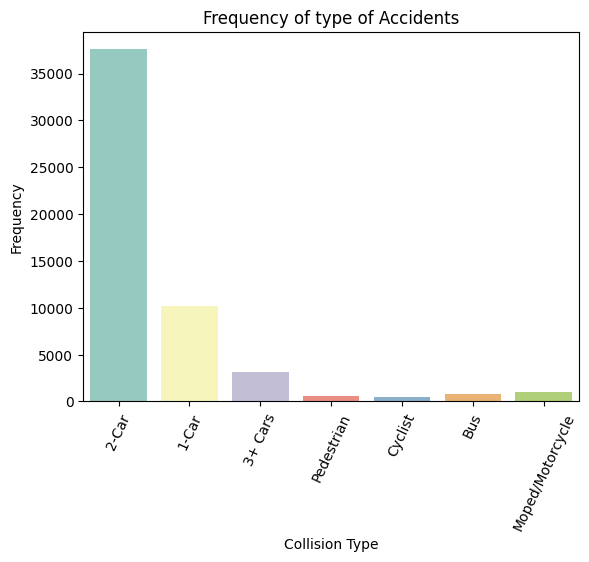

In [8]:
sb.countplot(x=data['Collision Type'],palette='Set3')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.title('Frequency of type of Accidents')

Text(0.5, 1.0, 'Weekday Vs Weekend')

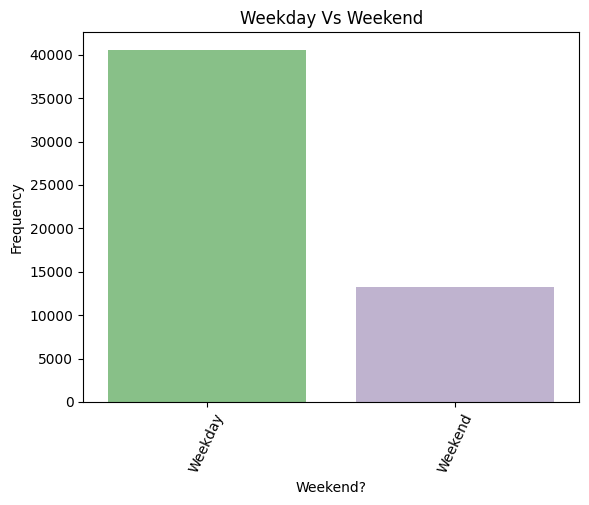

In [9]:
sb.countplot(x=data['Weekend?'],palette='Accent')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.title('Weekday Vs Weekend')

In [10]:
inj_val=data['Injury Type'].value_counts()
print(inj_val)

No injury/unknown     41542
Non-incapacitating    11133
Incapacitating         1089
Fatal                   115
Name: Injury Type, dtype: int64


Text(0.5, 1.0, 'percentage of Injury in Category')

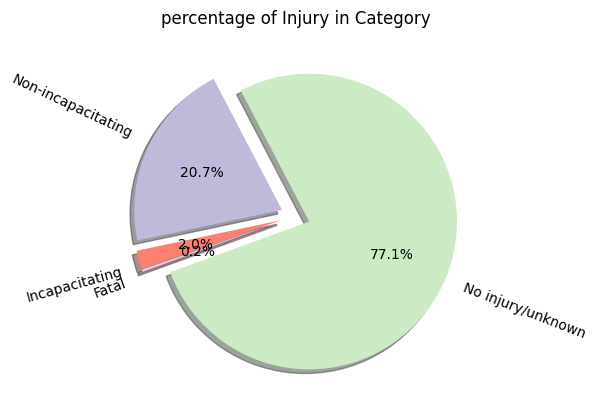

In [11]:
plt.pie(inj_val,labels=inj_val.index,startangle=200,shadow=True,autopct='%1.1f%%',rotatelabels=90,explode=(0.1,0.1,0.1,0.1),colors=[c4(0.9),c4(0.2),c4(0.3),c4(0.6)])
plt.title('percentage of Injury in Category')

In [12]:
data['Primary Factor'].nunique()

55

In [13]:
pfdata=data['Primary Factor'].value_counts().head(20)

Text(0.5, 1.0, 'Most Common Reason For Accident')

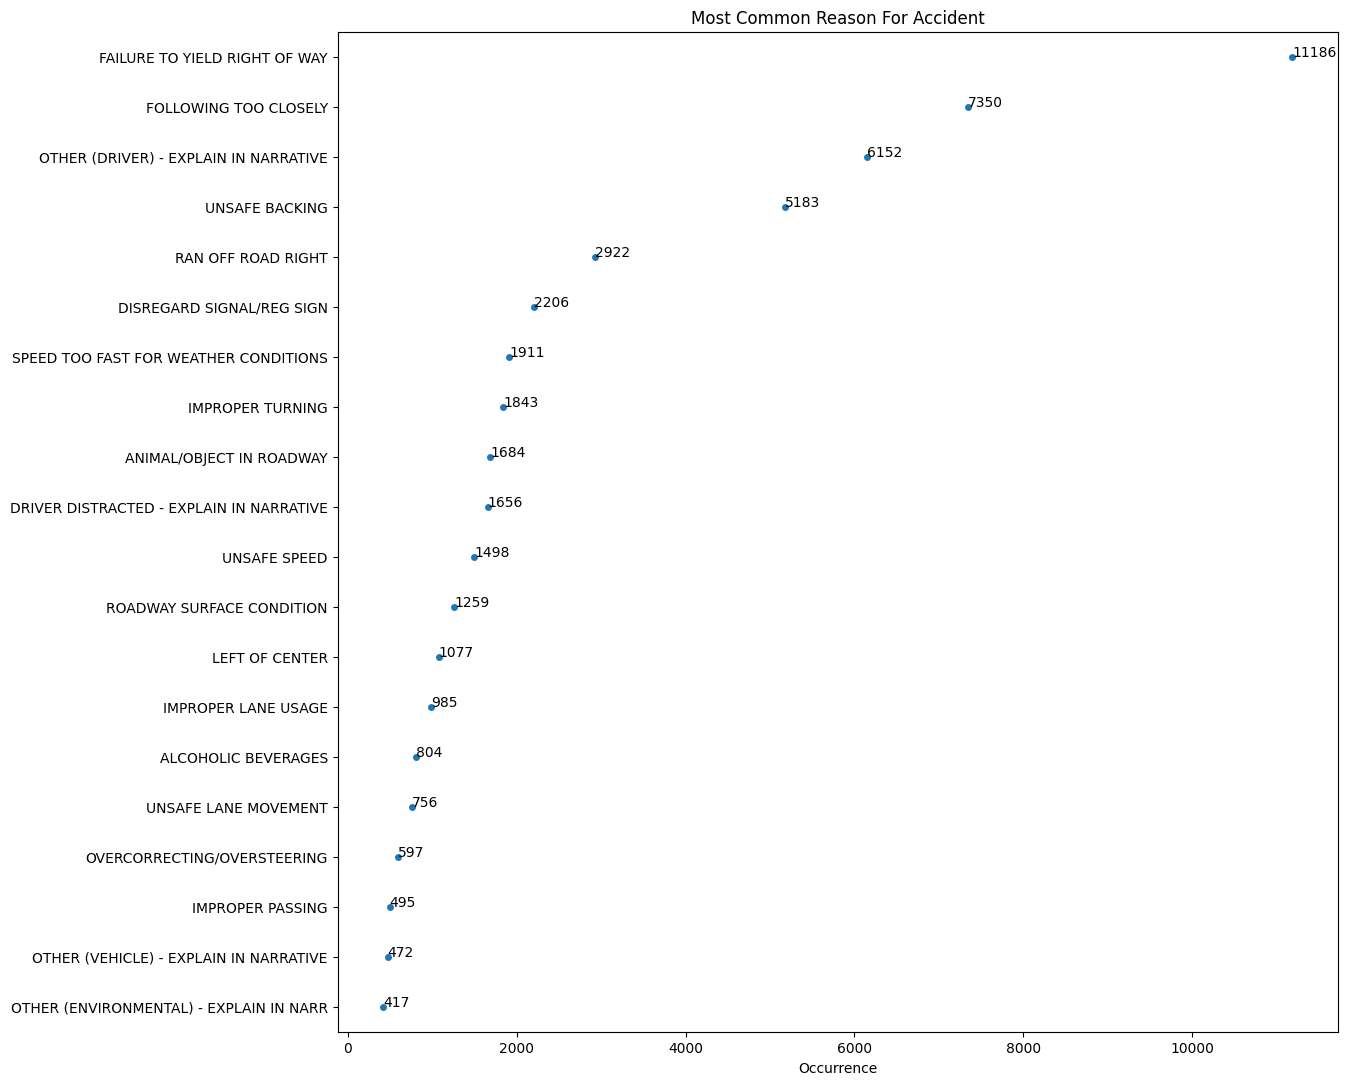

In [14]:
fig=plt.figure(figsize=(10,10))
axis=fig.add_axes([1,1,1,1])
sb.swarmplot(data=pfdata,y=pfdata.index,x=pfdata,ax=axis)
for i,j in enumerate(pfdata):
    axis.text(j,i,j)
plt.xlabel('Occurrence')
plt.title('Most Common Reason For Accident')


In [15]:
rldata=data['Reported_Location'].value_counts().head(30)

Text(0.5, 1.0, 'Most Frequent Location Of Accident')

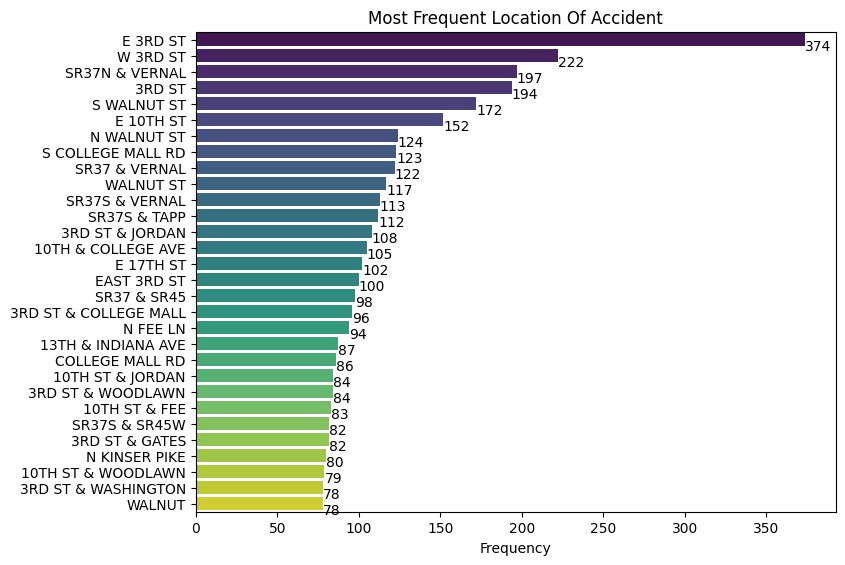

In [16]:
fig1=plt.figure()
axis1=fig1.add_axes([1,1,1,1])
sb.barplot(x=rldata,y=rldata.index,ax=axis1,palette='viridis')
for i,j in enumerate(rldata):
    axis1.text(j,i,j,va='top')
axis1.set_xlabel('Frequency')
axis1.set_title('Most Frequent Location Of Accident')

In [17]:

grp=data.groupby('Year')
keys=grp.groups.keys()


print(grp)
print(keys)

dict_keys([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])


In [18]:
infobox=[]
for i in range(2003,2016):
    infobox.append(grp.get_group(i)['Collision Type'].value_counts())

Year 2003 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



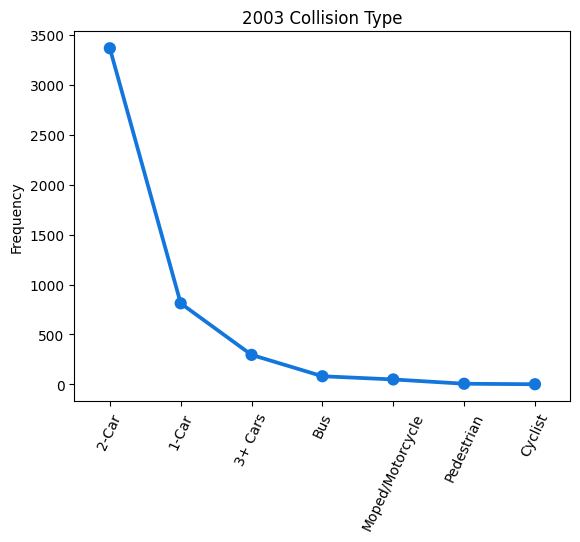

Year 2004 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



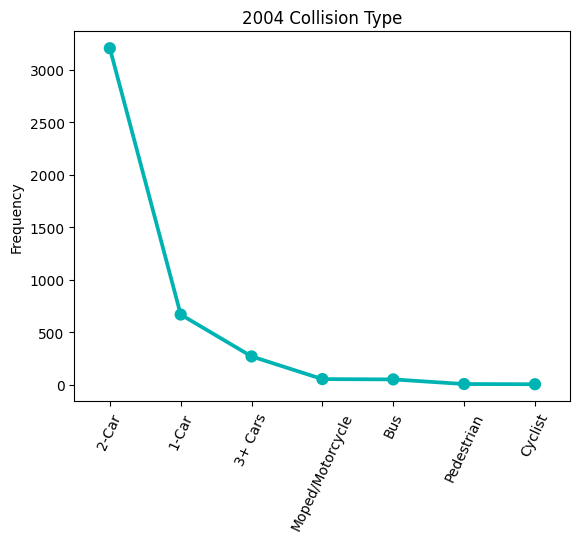

Year 2005 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



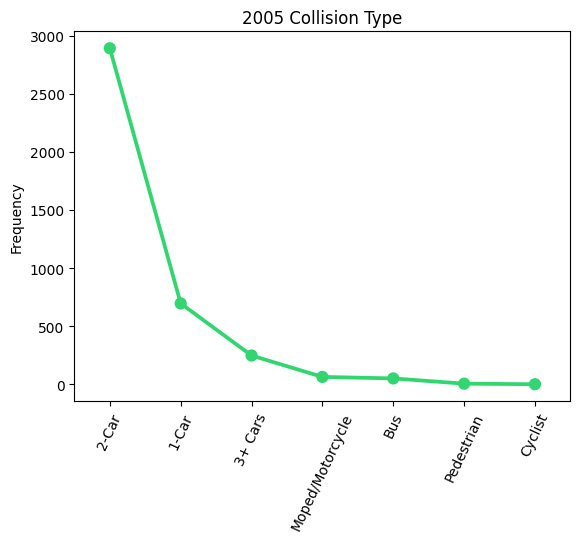

Year 2006 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



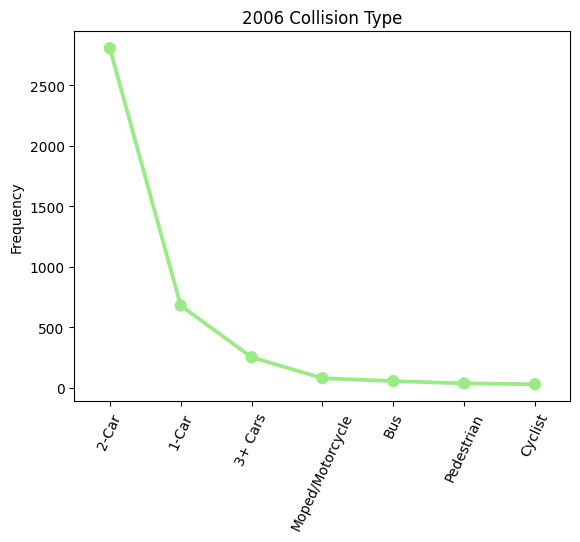

Year 2007 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



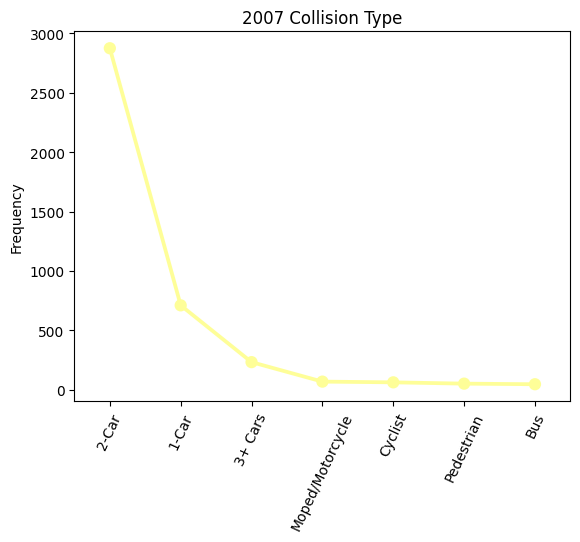

Year 2008 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



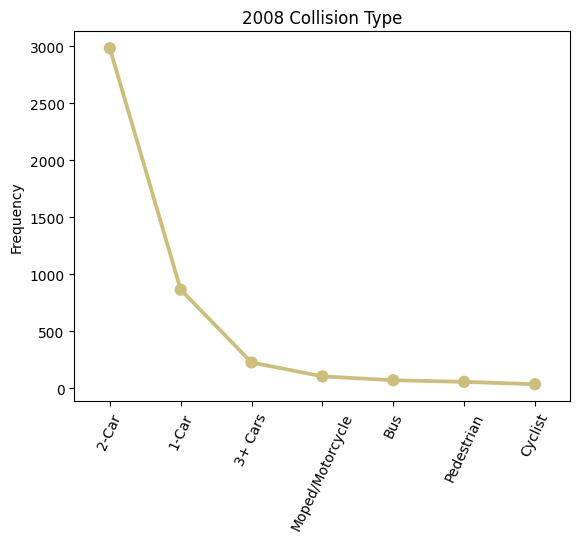

Year 2009 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



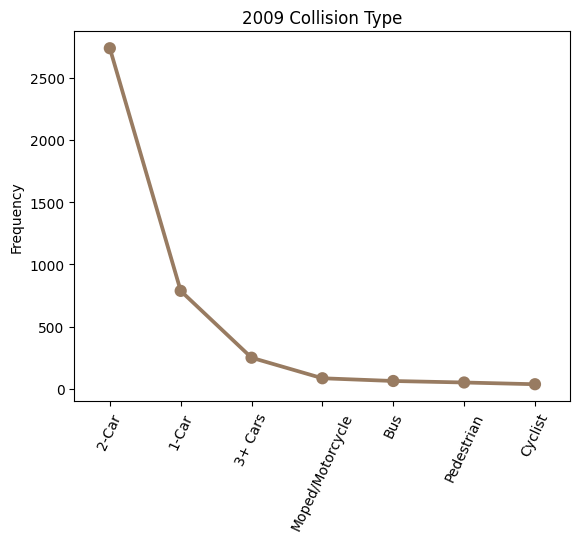

Year 2010 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



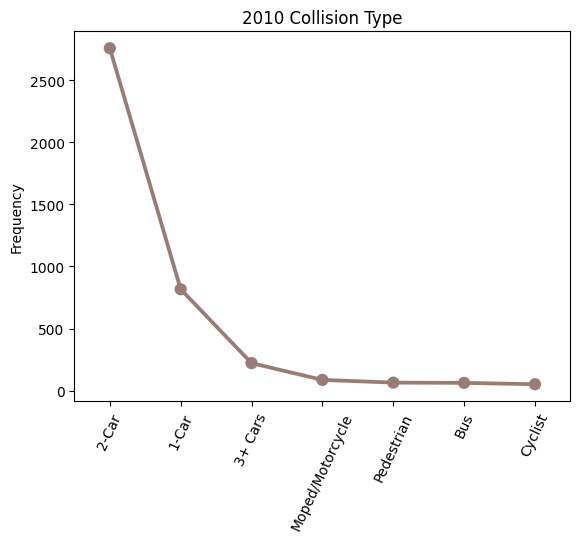

Year 2011 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



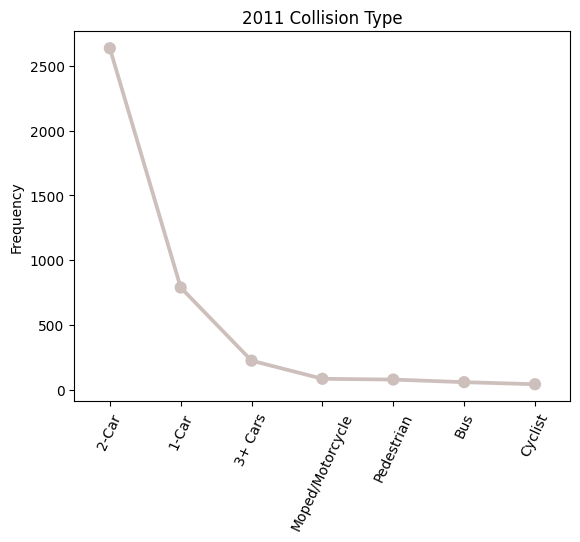

Year 2012 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



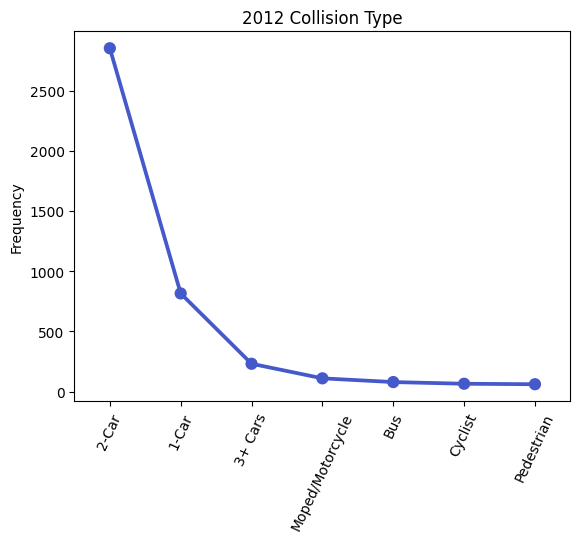

Year 2013 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



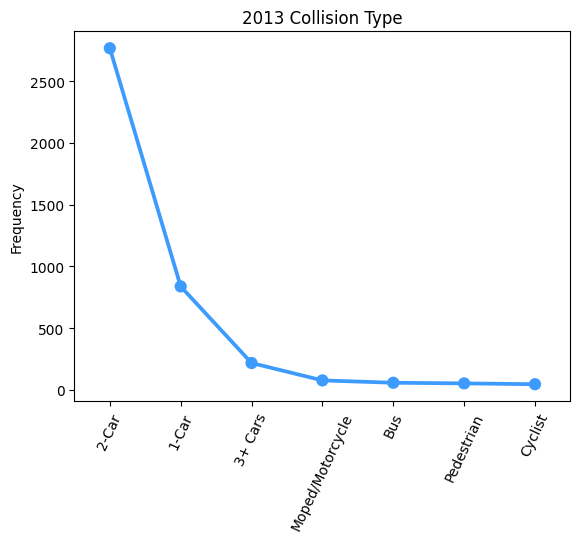

Year 2014 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



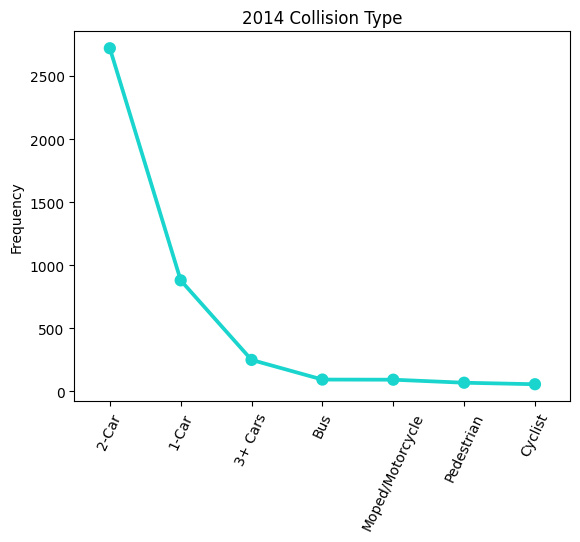

Year 2015 Collision Type Counts:
2-Car               2969
1-Car                868
3+ Cars              232
Bus                   80
Pedestrian            70
Moped/Motorcycle      53
Cyclist               36
Name: Collision Type, dtype: int64



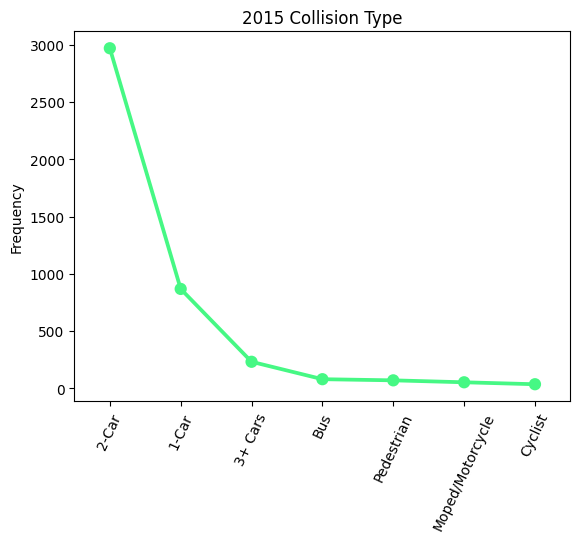

In [19]:
from matplotlib import cm
c2=cm.get_cmap('terrain')
count=0
val=0.1

for i, year_counts in enumerate(infobox):
    year = 2003 + i  # Calculate the year based on the loop index



for i in range(2003,2016):
    year = i  # Calculate the year based on the loop index
    print(f"Year {year} Collision Type Counts:")
    print(year_counts)
    print()
    sb.pointplot(x=infobox[count].index,y=infobox[count],color=c2(val))
    plt.xticks(rotation=65)
    plt.ylabel('Frequency')
    plt.title('%d Collision Type'%(i))
    plt.show()
    count+=1
    val+=0.1
    if val>=0.9:
        c2=cm.get_cmap('turbo')
        val=0.1




In [37]:
# !pip install folium

import folium
import pandas as pd

# Loading the data
url = 'https://github.com/tpcorreia/Master_AI_2023_UAX/raw/EDA-Training/CarCrashDataset.xlsx'
xls = pd.ExcelFile(url)
df = pd.read_excel(xls)

# Filtering the DataFrame
df_map = df[(df['Latitude'].notna()) & (df['Latitude'] != 0) &
            (df['Longitude'].notna()) & (df['Longitude'] != 0) &
            (df['Reported_Location'].notna())]

# Group by Reported_Location and count the total number of crashes
total_crashes_summary = df_map.groupby('Reported_Location').size().reset_index(name='Total_Crashes')

# Merge the total crash summary with the original DataFrame
df_map = pd.merge(df_map, total_crashes_summary, on='Reported_Location', how='left')

# Filter and reset index
df_map_head = df_map.head(50).reset_index(drop=True)

# Create a map centered at a specific location
m = folium.Map(location=[39.1653, -86.5264], zoom_start=13)

# Function to create a summary string for the tooltip
def create_tooltip(row):
    # Include the total number of crashes in the tooltip
    return f"{row['Reported_Location']}: Total Crashes: {row['Total_Crashes']}"

# Add markers with conditional coloring
for index, row in df_map_head.iterrows():
    tooltip = create_tooltip(row)

    # Determine the marker color based on the total number of crashes
    if row['Total_Crashes'] == 1:
        color = 'blue'
    elif 2 <= row['Total_Crashes'] <= 4:
        color = 'orange'
    elif 5 <= row['Total_Crashes'] <= 9:
        color = 'purple'
    else:
        color = 'red'  # For more than 9 crashes

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        tooltip=tooltip,
        icon=folium.Icon(color=color)
    ).add_to(m)

# Display the map
m
